In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
Cleaned_Nbacombined = pd.read_csv('/Users/omardukureh12/Capstone_377/data/processed/nba_combined.csv')
Cleaned_Nbacombined = Cleaned_Nbacombined.dropna()

In [34]:
print(Cleaned_Nbacombined.shape[0])
print(Cleaned_Nbacombined[Cleaned_Nbacombined['Year'] == 2024].shape[0])


3464
514


With the Percentage of the data of 2024 stats being a little around 15% of the entire data set, I will be using data from the 2024 stats as a test set and the rest of the data as a training set.

In [35]:
train  = Cleaned_Nbacombined[Cleaned_Nbacombined['Year']<2024]
test = Cleaned_Nbacombined[Cleaned_Nbacombined['Year']==2024]

In [36]:
features = [ 'VORP', 'FG',  'TRB',  'PER',  'FTA', 'MP', 'GS', 'PTS', 'G', 'Year']
target = ['WS']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# XGBoost Model

In [37]:
import xgboost as xgb
from xgboost import XGBRegressor

In [38]:

# Initialize an XGBRegressor model with specified hyperparameters
XGB_reg = XGBRegressor(
    n_estimators=2000,         # Maximum number of boosting rounds (trees)
    learning_rate=0.15,        # Step size shrinkage to prevent overfitting
    early_stopping_rounds= 150, # Stop training if no improvement in 150 rounds on eval_set[1]
    reg_alpha= 0.1,        # L1 regularization strength
    reg_lambda= 1    # L2 regularization strength
    )

# Train the model on the training data
XGB_reg.fit(
    X_train, y_train,                         # Training features and target
    eval_set=[(X_train, y_train), (X_test, y_test)], # Evaluation on both train and test sets
    verbose=100                               # Print training progress every 100 iterations
)

[0]	validation_0-rmse:2.19243	validation_1-rmse:2.34938


[100]	validation_0-rmse:0.19633	validation_1-rmse:0.61472
[200]	validation_0-rmse:0.10481	validation_1-rmse:0.61634
[265]	validation_0-rmse:0.07217	validation_1-rmse:0.61704


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=150,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.15, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, ...)

# Simple Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
target_log  = ["log_WS"] #need to  change this to becuase linear regression assumes normality. 
features_log = [ 'VORP', 'FG',  'TRB',  'PER',  'FTA', 'MP', 'GS', 'PTS', 'G','Year']
Xtrain2 = train[features_log]
ytrain2 = train[target_log]

LR_Model = LinearRegression()
LR_Model.fit(Xtrain2, ytrain2)

LinearRegression()

# Random Forest Regression Model

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  

In [56]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose = 100
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 5/5; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.450 total time=   0.9s
[CV 5/5; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.421 total time=   0.9s
[CV 1/5; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.407 total time=   0.9s
[CV 3/5; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.470 total time=   0.9s
[CV 4/5; 1/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.410 total time=   0.9s
[CV 4/5; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 3/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 3/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.451 total time=   1.9s
[CV 1/5; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.405 total time=   1.8s
[CV 3/5; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.463 total time=   1.9s
[CV 4/5; 3/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/5; 3/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 4/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.414 total time=   1.7s
[CV 4/5; 2/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.411 total time=   1.7s
[CV 2/5; 4/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 4/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 4/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.410 total time=   0.7s
[CV 4/5; 4/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 4/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.447 total time=   0.8s
[CV 5/5; 4/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 4/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.470 total time=   0.8s
[CV 1/5; 5/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 4/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.413 total time=   0.8s
[CV 2/5; 5/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 4/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.418 total time=   0.6s
[CV 3/5; 5/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 3/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.463 total time=   3.2s
[CV 4/5; 5/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 3/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.451 total time=   3.2s
[CV 5/5; 5/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 3/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.400 total time=   3.3s
[CV 1/5; 6/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 5/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.450 total time=   1.2s
[CV 2/5; 6/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 1/5; 5/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.2s
[CV 3/5; 6/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 3/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.413 total time=   2.9s
[CV 4/5; 6/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/5; 3/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.416 total time=   3.0s
[CV 5/5; 6/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 5/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.466 total time=   1.2s
[CV 1/5; 7/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 5/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   1.3s
[CV 2/5; 7/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 5/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.413 total time=   1.3s
[CV 3/5; 7/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 7/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 4/5; 7/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 7/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.460 total time=   0.5s
[CV 5/5; 7/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 7/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.462 total time=   0.5s
[CV 1/5; 8/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 7/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.429 total time=   0.5s
[CV 2/5; 8/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 7/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.414 total time=   0.5s
[CV 3/5; 8/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 6/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.401 total time=   2.4s
[CV 4/5; 8/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 8/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.407 total time=   0.9s
[CV 5/5; 8/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 6/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.449 total time=   2.4s
[CV 1/5; 9/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 6/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.465 total time=   2.5s
[CV 2/5; 9/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/5; 6/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.413 total time=   2.5s
[CV 2/5; 8/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.460 total time=   1.0s
[CV 3/5; 9/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/5; 9/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/5; 6/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.413 total time=   2.5s
[CV 5/5; 9/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 3/5; 8/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.463 total time=   1.0s
[CV 1/5; 10/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 8/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.430 total time=   1.0s
[CV 2/5; 10/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 8/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   1.0s
[CV 3/5; 10/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 10/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.403 total time=   0.5s
[CV 4/5; 10/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 10/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.443 total time=   0.5s
[CV 5/5; 10/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 10/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.465 total time=   0.5s
[CV 1/5; 11/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 10/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.416 total time=   0.7s
[CV 2/5; 11/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 10/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.410 total time=   0.9s
[CV 3/5; 11/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 9/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.401 total time=   2.5s
[CV 4/5; 11/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 9/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.460 total time=   2.4s
[CV 5/5; 11/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 9/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.410 total time=   2.4s
[CV 4/5; 9/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.433 total time=   2.5s
[CV 1/5; 12/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 12/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 9/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   2.5s
[CV 3/5; 12/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 11/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.402 total time=   1.6s
[CV 4/5; 12/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 11/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.449 total time=   1.6s
[CV 5/5; 12/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 11/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   1.3s
[CV 1/5; 13/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 11/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.3s
[CV 2/5; 13/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 11/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.2s
[CV 3/5; 13/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 13/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.404 total time=   0.6s
[CV 4/5; 13/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 13/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.443 total time=   0.5s
[CV 5/5; 13/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 13/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.467 total time=   0.6s
[CV 1/5; 14/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 13/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.414 total time=   0.6s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 14/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 13/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.415 total time=   0.6s
[CV 3/5; 14/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 12/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.449 total time=   2.4s
[CV 4/5; 14/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 12/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.464 total time=   2.4s
[CV 5/5; 14/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 12/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.395 total time=   2.4s
[CV 1/5; 15/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 4/5; 12/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.3s
[CV 2/5; 15/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 1/5; 14/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.404 total time=   1.2s
[CV 3/5; 15/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 5/5; 12/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.4s
[CV 4/5; 15/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/5; 14/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.449 total time=   1.2s
[CV 5/5; 15/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 14/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   1.2s
[CV 1/5; 16/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 14/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.1s
[CV 2/5; 16/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 14/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   1.5s
[CV 3/5; 16/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 16/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.404 total time=   0.9s
[CV 4/5; 16/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 16/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.461 total time=   1.2s
[CV 5/5; 16/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 16/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.465 total time=   1.0s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 17/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 16/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   1.0s
[CV 2/5; 17/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 5/5; 16/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.413 total time=   0.7s
[CV 3/5; 17/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 15/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.396 total time=   3.2s
[CV 4/5; 17/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 15/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.450 total time=   3.3s
[CV 5/5; 17/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 15/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   3.1s
[CV 3/5; 15/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.464 total time=   3.2s
[CV 1/5; 18/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 1/5; 17/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.402 total time=   1.1s
[CV 2/5; 18/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 18/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 5/5; 15/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.409 total time=   3.2s
[CV 4/5; 18/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 17/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.462 total time=   1.0s
[CV 5/5; 18/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 17/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.464 total time=   1.1s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 19/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 17/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.428 total time=   1.1s
[CV 2/5; 19/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 17/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.411 total time=   1.1s
[CV 3/5; 19/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 19/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.396 total time=   0.6s
[CV 4/5; 19/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 19/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 5/5; 19/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 19/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 20/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 19/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.428 total time=   0.6s
[CV 2/5; 20/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 19/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.408 total time=   0.7s
[CV 3/5; 20/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 18/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   2.4s
[CV 4/5; 20/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 18/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.398 total time=   2.5s
[CV 5/5; 20/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 18/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.461 total time=   2.6s
[CV 1/5; 21/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 18/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.432 total time=   2.6s
[CV 5/5; 18/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.409 total time=   2.4s
[CV 3/5; 21/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 21/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 20/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.395 total time=   1.4s
[CV 4/5; 21/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 20/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   1.2s
[CV 5/5; 21/108] START max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 20/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.468 total time=   1.5s
[CV 1/5; 22/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 20/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.434 total time=   1.1s
[CV 2/5; 22/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 20/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.410 total time=   1.4s
[CV 3/5; 22/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 22/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 4/5; 22/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 22/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.396 total time=   0.6s
[CV 5/5; 22/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 22/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 23/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 22/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.428 total time=   0.5s
[CV 2/5; 23/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 22/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 3/5; 23/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 21/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.394 total time=   2.0s
[CV 4/5; 23/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 21/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.468 total time=   2.1s
[CV 5/5; 23/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 21/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.466 total time=   2.2s
[CV 1/5; 24/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 21/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.410 total time=   2.0s
[CV 2/5; 24/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 4/5; 21/108] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.438 total time=   2.1s
[CV 3/5; 24/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 23/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.395 total time=   1.0s
[CV 4/5; 24/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/5; 23/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   1.1s
[CV 5/5; 24/108] START max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 23/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.468 total time=   1.1s
[CV 1/5; 25/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 23/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.434 total time=   1.1s
[CV 2/5; 25/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 23/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   1.1s
[CV 3/5; 25/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 25/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.400 total time=   0.5s
[CV 4/5; 25/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 25/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.468 total time=   0.5s
[CV 5/5; 25/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 25/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.477 total time=   0.4s
[CV 1/5; 26/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 25/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   0.5s
[CV 2/5; 26/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 25/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.411 total time=   0.4s
[CV 3/5; 26/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 24/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.394 total time=   2.0s
[CV 4/5; 26/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 24/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.468 total time=   2.0s
[CV 5/5; 26/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 24/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.466 total time=   2.1s
[CV 1/5; 27/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 26/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.398 total time=   0.9s
[CV 2/5; 27/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 24/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.438 total time=   2.0s
[CV 3/5; 27/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 5/5; 24/108] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.410 total time=   1.9s
[CV 4/5; 27/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 2/5; 26/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.469 total time=   1.0s
[CV 5/5; 27/108] START max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 26/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.471 total time=   1.0s
[CV 1/5; 28/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 26/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.439 total time=   1.0s
[CV 2/5; 28/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 26/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   1.0s
[CV 3/5; 28/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 28/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.413 total time=   0.7s
[CV 4/5; 28/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 28/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.449 total time=   0.7s
[CV 5/5; 28/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 28/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.472 total time=   0.7s
[CV 1/5; 29/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 28/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.419 total time=   0.6s
[CV 2/5; 29/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 27/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.396 total time=   2.0s
[CV 3/5; 29/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 28/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.418 total time=   0.6s
[CV 4/5; 29/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 27/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.469 total time=   2.1s
[CV 5/5; 29/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 27/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.471 total time=   2.1s
[CV 1/5; 30/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 27/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.444 total time=   2.2s
[CV 5/5; 27/108] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 2/5; 30/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 30/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 29/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.411 total time=   1.2s
[CV 4/5; 30/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 29/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.453 total time=   1.2s
[CV 5/5; 30/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 29/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.466 total time=   1.2s
[CV 1/5; 31/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 29/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.413 total time=   1.0s
[CV 2/5; 31/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 29/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.415 total time=   1.0s
[CV 3/5; 31/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 31/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.409 total time=   0.4s
[CV 4/5; 31/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 31/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.454 total time=   0.5s
[CV 5/5; 31/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 31/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.472 total time=   0.4s
[CV 1/5; 32/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 31/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.421 total time=   0.4s
[CV 2/5; 32/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 31/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.413 total time=   0.5s
[CV 3/5; 32/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 30/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.405 total time=   2.1s
[CV 2/5; 30/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.458 total time=   2.0s
[CV 4/5; 32/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 32/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 30/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.466 total time=   2.1s
[CV 1/5; 33/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/5; 30/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.418 total time=   2.0s
[CV 2/5; 33/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 1/5; 32/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.409 tota

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 32/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.457 total time=   1.1s
[CV 4/5; 33/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 5/5; 30/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.413 total time=   2.1s
[CV 5/5; 33/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/5; 32/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.467 total time=   1.0s
[CV 1/5; 34/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 32/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   0.9s
[CV 2/5; 34/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 32/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.417 total time=   1.0s
[CV 3/5; 34/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 34/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.414 total time=   0.5s
[CV 4/5; 34/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 34/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 5/5; 34/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 34/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.467 total time=   0.5s
[CV 1/5; 35/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 34/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.438 total time=   0.7s
[CV 2/5; 35/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 33/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.405 total time=   2.1s
[CV 3/5; 35/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 33/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.457 total time=   2.2s
[CV 5/5; 34/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.411 total time=   0.8s
[CV 4/5; 35/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 35/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 33/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.466 total time=   2.2s
[CV 1/5; 36/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 1/5; 35/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.411 total time=   1.1s
[CV 2/5; 36/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/5; 33/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.418 total time=   2.2s
[CV 3/5; 36/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 2/5; 35/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.463 total time=   1.0s
[CV 4/5; 36/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 33/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 5/5; 36/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/5; 35/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.468 total time=   0.9s
[CV 1/5; 37/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 35/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   0.9s
[CV 2/5; 37/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 35/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.435 total time=   0.9s
[CV 3/5; 37/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 37/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.409 total time=   0.5s
[CV 4/5; 37/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 37/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.445 total time=   0.5s
[CV 5/5; 37/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 37/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.471 total time=   0.4s
[CV 1/5; 38/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 37/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.417 total time=   0.4s
[CV 5/5; 37/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.413 total time=   0.4s
[CV 2/5; 38/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 38/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 36/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.407 total time=   1.9s
[CV 4/5; 38/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 36/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.464 total time=   1.8s
[CV 5/5; 38/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 36/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.470 total time=   1.8s
[CV 1/5; 39/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 36/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.437 total time=   1.8s
[CV 2/5; 39/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 38/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.406 total time=   1.0s
[CV 3/5; 39/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 36/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.411 total time=   1.8s
[CV 4/5; 39/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 38/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.469 total time=   0.9s
[CV 5/5; 39/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 38/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.453 total time=   1.0s
[CV 1/5; 40/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 38/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.409 total time=   1.0s
[CV 2/5; 40/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 38/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.412 total time=   1.0s
[CV 3/5; 40/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 40/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.410 total time=   0.5s
[CV 4/5; 40/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 40/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.447 total time=   0.5s
[CV 5/5; 40/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 40/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.473 total time=   0.5s
[CV 1/5; 41/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 40/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.421 total time=   0.5s
[CV 2/5; 41/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 40/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.413 total time=   0.4s
[CV 3/5; 41/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 39/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.400 total time=   2.0s
[CV 4/5; 41/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 39/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.470 total time=   1.9s
[CV 5/5; 41/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 39/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.455 total time=   2.0s
[CV 1/5; 42/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 39/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.411 total time=   2.0s
[CV 2/5; 42/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 1/5; 41/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.0s
[CV 3/5; 42/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 5/5; 39/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.410 total time=   2.0s
[CV 4/5; 42/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 41/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.454 total time=   1.0s
[CV 5/5; 42/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 3/5; 41/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.469 total time=   1.0s
[CV 1/5; 43/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 41/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.414 total time=   0.9s
[CV 2/5; 43/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 41/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   0.9s
[CV 3/5; 43/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 43/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.410 tota

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 43/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.459 total time=   0.4s
[CV 5/5; 43/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 43/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.469 total time=   0.5s
[CV 1/5; 44/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 43/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.435 total time=   0.5s
[CV 2/5; 44/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 43/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.414 total time=   0.6s
[CV 3/5; 44/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 42/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.403 total time=   2.0s
[CV 4/5; 44/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 42/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.456 total time=   2.3s
[CV 5/5; 44/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 44/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.407 total time=   1.2s
[CV 1/5; 45/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 42/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.468 total time=   2.3s
[CV 2/5; 45/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 42/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.415 total time=   2.3s
[CV 3/5; 45/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 5/5; 42/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 4/5; 45/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/5; 44/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.464 total time=   1.3s
[CV 5/5; 45/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 44/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.466 total time=   1.0s
[CV 1/5; 46/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 4/5; 44/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.432 total time=   1.1s
[CV 2/5; 46/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 46/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.398 total time=   0.5s
[CV 3/5; 46/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 44/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   1.0s
[CV 4/5; 46/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 46/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.463 total time=   0.5s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 46/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 46/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.478 total time=   0.5s
[CV 1/5; 47/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 46/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.426 total time=   0.5s
[CV 2/5; 47/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 46/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.409 total time=   0.5s
[CV 3/5; 47/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 45/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.403 total time=   1.9s
[CV 4/5; 47/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 45/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.468 total time=   1.9s
[CV 5/5; 47/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 45/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.465 total time=   2.0s
[CV 1/5; 48/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 45/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.435 total time=   2.0s
[CV 2/5; 48/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 47/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.399 total time=   0.9s
[CV 3/5; 48/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 47/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.465 total time=   0.9s
[CV 5/5; 45/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.412 total time=   2.1s
[CV 5/5; 48/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 48/108] START max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 3/5; 47/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.470 total time=   1.0s
[CV 1/5; 49/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 47/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.433 total time=   1.1s
[CV 2/5; 49/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 49/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.398 total time=   0.7s
[CV 3/5; 49/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 47/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.412 total time=   1.2s
[CV 4/5; 49/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 49/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.463 total time=   0.5s
[CV 5/5; 49/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 49/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.478 total time=   0.5s
[CV 1/5; 50/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 49/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.426 total time=   0.5s
[CV 2/5; 50/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 49/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.409 total time=   0.5s
[CV 3/5; 50/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 48/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.468 total time=   2.0s
[CV 4/5; 50/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 48/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.398 total time=   2.1s
[CV 5/5; 50/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 48/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.470 total time=   2.1s
[CV 1/5; 51/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 4/5; 48/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.438 total time=   2.1s
[CV 2/5; 51/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/5; 50/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.465 total time=   0.8s
[CV 3/5; 51/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 5/5; 48/108] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 4/5; 51/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 1/5; 50/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.399 total time=   0.9s
[CV 5/5; 51/108] START max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 50/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.433 total time=   0.9s
[CV 3/5; 50/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.470 total time=   0.9s
[CV 1/5; 52/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 50/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   0.9s
[CV 2/5; 52/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 52/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 52/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.402 total time=   0.4s
[CV 4/5; 52/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 52/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.481 total time=   0.4s
[CV 5/5; 52/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 52/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.470 total time=   0.4s
[CV 1/5; 53/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 52/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.434 total time=   0.4s
[CV 2/5; 53/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 52/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.410 total time=   0.4s
[CV 3/5; 53/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 51/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.398 total time=   1.7s
[CV 4/5; 53/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 51/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.468 total time=   1.7s
[CV 5/5; 53/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 51/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.470 total time=   1.7s
[CV 1/5; 54/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 4/5; 51/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.438 total time=   1.7s
[CV 2/5; 54/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 51/108] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   1.8s
[CV 3/5; 54/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 1/5; 53/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.400 total time=   1.0s
[CV 4/5; 54/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 53/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.471 total time=   1.0s
[CV 5/5; 54/108] START max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 53/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.473 total time=   1.1s
[CV 1/5; 55/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 53/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.414 total time=   1.0s
[CV 2/5; 55/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 53/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.440 total time=   1.1s
[CV 3/5; 55/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 55/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.409 total time=   0.7s
[CV 4/5; 55/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 55/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.452 total time=   0.7s
[CV 5/5; 55/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 55/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.474 total time=   0.7s
[CV 1/5; 56/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 54/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.399 total time=   2.0s
[CV 2/5; 56/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 54/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.472 total time=   1.9s
[CV 3/5; 56/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 54/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.473 total time=   1.9s
[CV 4/5; 56/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 54/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.444 total time=   1.8s
[CV 5/5; 56/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 4/5; 55/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.408 total time=   0.7s
[CV 1/5; 57/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/5; 55/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.420 total time=   0.7s
[CV 2/5; 57/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 54/108] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.411 total time=   1.8s
[CV 3/5; 57/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 56/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.404 total time=   1.5s
[CV 4/5; 57/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 56/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.453 total time=   1.3s
[CV 5/5; 57/108] START max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 56/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.466 total time=   1.7s
[CV 1/5; 58/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 56/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.6s
[CV 2/5; 58/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 56/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.413 total time=   1.6s
[CV 3/5; 58/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 58/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.410 total time=   0.6s
[CV 2/5; 58/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.448 total time=   0.6s
[CV 4/5; 58/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 58/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 58/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.468 total time=   0.6s
[CV 1/5; 59/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 58/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.413 total time=   0.6s
[CV 2/5; 59/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 58/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.417 total time=   0.7s
[CV 3/5; 59/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 57/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.398 total time=   3.1s
[CV 4/5; 59/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 57/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.453 total time=   3.1s
[CV 5/5; 59/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 57/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.464 total time=   3.1s
[CV 1/5; 60/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 59/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.406 total time=   1.3s
[CV 2/5; 60/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 57/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.412 total time=   2.9s
[CV 3/5; 60/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/5; 59/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.451 total time=   1.2s
[CV 4/5; 60/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/5; 59/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.467 total time=   1.2s
[CV 5/5; 60/108] START max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 5/5; 57/108] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.413 total time=   3.0s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 1/5; 61/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 59/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.413 total time=   1.2s
[CV 2/5; 61/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 59/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   1.2s
[CV 3/5; 61/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 61/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.408 total time=   0.6s
[CV 4/5; 61/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 61/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.463 total time=   0.5s
[CV 5/5; 61/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 61/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.460 total time=   0.5s
[CV 1/5; 62/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 61/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.430 total time=   0.5s
[CV 2/5; 62/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 61/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.414 total time=   0.5s
[CV 3/5; 62/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 60/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.401 total time=   2.4s
[CV 4/5; 62/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 60/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.451 total time=   2.4s
[CV 5/5; 62/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 62/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.407 total time=   1.0s
[CV 1/5; 63/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 62/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.461 total time=   1.0s
[CV 2/5; 63/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/5; 60/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.465 total time=   2.4s
[CV 3/5; 63/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 4/5; 60/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.414 total time=   2.5s
[CV 3/5; 62/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.464 total time=   1.0s
[CV 4/5; 63/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/5; 63/108] START max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/5; 60/108] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.412 total time=   2.4s
[CV 1/5; 64/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 62/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.431 total time=   1.0s
[CV 2/5; 64/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 62/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.413 t

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 64/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.403 total time=   0.6s
[CV 4/5; 64/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 64/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.444 total time=   0.6s
[CV 5/5; 64/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 64/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.465 total time=   0.5s
[CV 1/5; 65/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 64/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.417 total time=   0.5s
[CV 2/5; 65/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 64/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.410 total time=   0.5s
[CV 3/5; 65/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 63/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.401 total time=   1.9s
[CV 4/5; 65/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 63/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.460 total time=   2.0s
[CV 5/5; 65/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 63/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   2.0s
[CV 1/5; 66/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 63/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.433 total time=   2.0s
[CV 2/5; 66/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 63/108] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.410 total time=   2.0s
[CV 3/5; 66/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 65/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.403 total time=   1.1s
[CV 4/5; 66/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 65/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.450 total time=   1.1s
[CV 5/5; 66/108] START max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 65/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   1.1s
[CV 1/5; 67/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 65/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.1s
[CV 2/5; 67/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 65/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.1s
[CV 3/5; 67/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 67/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.404 total time=   0.6s
[CV 4/5; 67/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 67/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.442 total time=   0.5s
[CV 5/5; 67/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 67/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.467 total time=   0.5s
[CV 1/5; 68/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 67/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.414 total time=   0.6s
[CV 4/5; 67/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.414 total time=   0.7s
[CV 2/5; 68/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 68/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 66/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.395 total time=   2.2s
[CV 4/5; 68/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 66/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.464 total time=   2.2s
[CV 2/5; 66/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.449 total time=   2.3s
[CV 5/5; 68/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 69/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 66/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.2s
[CV 2/5; 69/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 5/5; 66/108] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.3s
[CV 3/5; 69/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 68/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.403 total time=   1.2s
[CV 4/5; 69/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 68/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   1.0s
[CV 5/5; 69/108] START max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 2/5; 68/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.449 total time=   1.1s
[CV 1/5; 70/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 68/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.0s
[CV 2/5; 70/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 68/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   1.1s
[CV 3/5; 70/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 70/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.404 total time=   0.5s
[CV 4/5; 70/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 70/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 5/5; 70/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 70/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.465 total time=   0.5s
[CV 1/5; 71/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 70/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   0.5s
[CV 2/5; 71/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 70/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.413 total time=   0.5s
[CV 3/5; 71/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 69/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.396 total time=   2.0s
[CV 4/5; 71/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 69/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.450 total time=   2.1s
[CV 5/5; 71/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 69/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.464 total time=   2.1s
[CV 1/5; 72/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 71/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.402 total time=   1.0s
[CV 2/5; 72/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 4/5; 69/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 3/5; 72/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/5; 71/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.462 total time=   1.0s
[CV 4/5; 72/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 5/5; 69/108] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.409 total time=   2.1s
[CV 5/5; 72/108] START max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 3/5; 71/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.464 total time=   1.0s
[CV 1/5; 73/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 71/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.428 total time=   1.0s
[CV 2/5; 73/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 71/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.411 total time=   0.9s
[CV 3/5; 73/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 73/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.396 total time=   0.4s
[CV 4/5; 73/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 73/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.461 total time=   0.4s
[CV 5/5; 73/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 73/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 74/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 73/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.428 total time=   0.5s
[CV 2/5; 74/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 73/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.408 total time=   0.4s
[CV 3/5; 74/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 72/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.398 total time=   1.8s
[CV 4/5; 74/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 72/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   1.8s
[CV 5/5; 74/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 72/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.461 total time=   1.9s
[CV 1/5; 75/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 72/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.432 total time=   1.9s
[CV 2/5; 75/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 74/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   0.8s
[CV 3/5; 75/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 5/5; 72/108] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.409 total time=   1.9s
[CV 4/5; 75/108] START max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 74/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.395 t

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 3/5; 74/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.468 total time=   0.9s
[CV 1/5; 76/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 74/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.434 total time=   0.9s
[CV 2/5; 76/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 76/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.396 total time=   0.4s
[CV 3/5; 76/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 74/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.410 total time=   0.9s
[CV 4/5; 76/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 76/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 5/5; 76/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 76/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 77/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 76/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.428 total time=   0.5s
[CV 2/5; 77/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 76/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 3/5; 77/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 75/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.394 total time=   1.7s
[CV 4/5; 77/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 75/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.466 total time=   1.7s
[CV 5/5; 77/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 75/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.468 total time=   1.8s
[CV 1/5; 78/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 5/5; 75/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.410 total time=   1.8s
[CV 2/5; 78/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 4/5; 75/108] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.438 total time=   1.8s
[CV 3/5; 78/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 77/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.395 total time=   0.9s
[CV 4/5; 78/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/5; 77/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   0.9s
[CV 5/5; 78/108] START max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 77/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.468 total time=   0.9s
[CV 1/5; 79/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 77/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.434 total time=   0.9s
[CV 2/5; 79/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 77/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   0.9s
[CV 3/5; 79/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 79/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.400 total time=   0.6s
[CV 4/5; 79/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 79/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.468 total time=   0.5s
[CV 5/5; 79/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 79/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.477 total time=   0.5s
[CV 1/5; 80/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 79/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   0.4s
[CV 2/5; 80/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 79/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.411 total time=   0.4s
[CV 3/5; 80/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 78/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.394 total time=   1.9s
[CV 4/5; 80/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 78/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.466 total time=   1.9s
[CV 5/5; 80/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 78/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.468 total time=   1.9s
[CV 1/5; 81/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 80/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.398 total time=   0.8s
[CV 2/5; 81/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 4/5; 78/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.438 total time=   1.9s
[CV 3/5; 81/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 5/5; 78/108] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.410 total time=   1.9s
[CV 4/5; 81/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 80/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.469 total time=   0.8s
[CV 5/5; 81/108] START max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 80/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.471 total time=   0.9s
[CV 1/5; 82/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 80/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.439 total time=   0.8s
[CV 2/5; 82/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 80/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   0.9s
[CV 3/5; 82/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 82/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.407 total time=   0.8s
[CV 4/5; 82/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 82/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.450 total time=   0.7s
[CV 5/5; 82/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 82/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.470 total time=   0.7s
[CV 1/5; 83/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 81/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.396 total time=   1.8s
[CV 2/5; 83/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 81/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.471 total time=   1.7s
[CV 3/5; 83/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 81/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.469 total time=   1.8s
[CV 4/5; 83/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 82/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.410 total time=   0.6s
[CV 5/5; 83/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 81/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.444 total time=   1.8s
[CV 1/5; 84/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 82/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=-0.421 total time=   0.7s
[CV 2/5; 84/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 5/5; 81/108] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.411 total time=   1.8s
[CV 3/5; 84/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 83/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.405 total time=   1.3s
[CV 4/5; 84/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 83/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.451 total time=   1.3s
[CV 5/5; 84/108] START max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 83/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.463 total time=   1.3s
[CV 1/5; 85/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 83/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.411 total time=   1.3s
[CV 2/5; 85/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 83/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.414 total time=   1.3s
[CV 3/5; 85/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 85/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.410 total time=   0.6s
[CV 4/5; 85/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 85/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.447 total time=   0.5s
[CV 5/5; 85/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 85/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.470 total time=   0.5s
[CV 1/5; 86/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 85/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.413 total time=   0.6s
[CV 2/5; 86/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 85/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=-0.418 total time=   0.6s
[CV 3/5; 86/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 84/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.400 total time=   2.5s
[CV 4/5; 86/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 84/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.451 total time=   2.5s
[CV 5/5; 86/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 84/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.463 total time=   2.6s
[CV 1/5; 87/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 86/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.2s
[CV 2/5; 87/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/5; 86/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.450 total time=   1.1s
[CV 3/5; 87/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/5; 86/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.466 total time=   1.1s
[CV 4/5; 87/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/5; 84/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.416 total time=   2.6s
[CV 5/5; 87/108] START max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 5/5; 84/108] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.413 tota

/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 4/5; 86/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.412 total time=   1.2s
[CV 2/5; 88/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 86/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.413 total time=   1.1s
[CV 3/5; 88/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 88/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 4/5; 88/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 88/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.462 total time=   0.5s
[CV 5/5; 88/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 88/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.460 total time=   0.6s
[CV 1/5; 89/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 88/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.429 total time=   0.6s
[CV 2/5; 89/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 88/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=-0.414 total time=   0.5s
[CV 3/5; 89/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 87/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.401 total time=   2.3s
[CV 4/5; 89/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 89/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.407 total time=   1.0s
[CV 5/5; 89/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 87/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.449 total time=   2.4s
[CV 1/5; 90/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 89/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.460 total time=   1.0s
[CV 2/5; 90/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/5; 89/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.463 total time=   1.0s
[CV 3/5; 90/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 87/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.465 total time=   2.4s
[CV 4/5; 90/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/5; 87/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.413 total time=   2.4s
[CV 5/5; 90/108] START max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/5; 87/108] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.413 total time=   2.5s
[CV 1/5; 91/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 89/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.430 total time=   1.0s
[CV 2/5; 91/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 89/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   0.9s
[CV 3/5; 91/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 91/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.403 total time=   0.5s
[CV 4/5; 91/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 91/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.443 total time=   0.6s
[CV 5/5; 91/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 91/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.465 total time=   0.5s
[CV 1/5; 92/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 91/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.416 total time=   0.6s
[CV 2/5; 92/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 91/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.410 total time=   0.6s
[CV 3/5; 92/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 90/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.401 total time=   2.0s
[CV 4/5; 92/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 90/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.460 total time=   1.9s
[CV 5/5; 92/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 90/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.410 total time=   1.9s
[CV 1/5; 93/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 90/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   2.0s
[CV 2/5; 93/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 4/5; 90/108] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.433 total time=   1.9s
[CV 3/5; 93/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 92/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.402 total time=   1.0s
[CV 4/5; 93/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 2/5; 92/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.449 total time=   1.1s
[CV 5/5; 93/108] START max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 92/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   1.1s
[CV 1/5; 94/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 92/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.2s
[CV 2/5; 94/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 92/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=-0.408 total time=   1.2s
[CV 3/5; 94/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 94/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.404 total time=   0.5s
[CV 4/5; 94/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 94/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.443 total time=   0.5s
[CV 5/5; 94/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 94/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.467 total time=   0.5s
[CV 1/5; 95/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 94/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.414 total time=   0.5s
[CV 2/5; 95/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 94/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=-0.415 total time=   0.5s
[CV 3/5; 95/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 93/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.464 total time=   2.2s
[CV 4/5; 95/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 93/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.395 total time=   2.3s
[CV 5/5; 95/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 93/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.2s
[CV 1/5; 96/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 93/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.449 total time=   2.4s
[CV 2/5; 96/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 5/5; 93/108] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.409 total time=   2.1s
[CV 3/5; 96/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200
[CV 1/5; 95/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.404 total time=   1.0s
[CV 4/5; 96/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 95/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.449 total time=   1.1s
[CV 5/5; 96/108] START max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 95/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   1.1s
[CV 1/5; 97/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 95/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.407 total time=   1.0s
[CV 2/5; 97/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 95/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   1.0s
[CV 3/5; 97/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 97/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.404 total time=   0.4s
[CV 4/5; 97/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 97/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.461 total time=   0.5s
[CV 5/5; 97/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 97/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.465 total time=   0.5s
[CV 1/5; 98/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 97/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   0.5s
[CV 2/5; 98/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 97/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=-0.413 total time=   0.6s
[CV 3/5; 98/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 96/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.396 total time=   2.1s
[CV 4/5; 98/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 98/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.402 total time=   1.0s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 96/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.450 total time=   2.2s
[CV 5/5; 98/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 99/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 96/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.464 total time=   2.2s
[CV 2/5; 99/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 4/5; 96/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.411 total time=   2.2s
[CV 3/5; 99/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 5/5; 96/108] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.409 total time=   2.2s
[CV 4/5; 99/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/5; 98/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.462 total time=   1.0s
[CV 5/5; 99/108] START max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 3/5; 98/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.464 total time=   1.0s
[CV 1/5; 100/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 98/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.428 total time=   0.9s
[CV 2/5; 100/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 98/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.411 total time=   0.9s
[CV 3/5; 100/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 100/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.396 total time=   0.4s
[CV 4/5; 100/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 100/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.461 total time=   0.4s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 100/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 100/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 101/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 100/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.428 total time=   0.4s
[CV 2/5; 101/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 100/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 3/5; 101/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 99/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.398 total time=   1.9s
[CV 4/5; 101/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 99/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.461 total time=   1.9s
[CV 5/5; 101/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 99/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.466 total time=   1.9s
[CV 1/5; 102/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 99/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.409 total time=   1.8s
[CV 2/5; 102/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 4/5; 99/108] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.432 total time=   1.9s
[CV 3/5; 102/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 2/5; 101/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.464 total time=   0.8s
[CV 4/5; 102/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200
[CV 1/5; 101/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.395 total time=   0.9s
[CV 5/5; 102/108] START max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 3/5; 101/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.468 total time=   0.9s
[CV 1/5; 103/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 101/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.434 total time=   0.9s
[CV 2/5; 103/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 101/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.410 total time=   0.9s
[CV 3/5; 103/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 103/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.396 total time=   0.5s
[CV 4/5; 103/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 103/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.461 total time=   0.4s
[CV 5/5; 103/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 103/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.475 total time=   0.5s
[CV 1/5; 104/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 103/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.428 total time=   0.4s
[CV 2/5; 104/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 103/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=-0.408 total time=   0.5s
[CV 3/5; 104/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 102/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.394 total time=   1.8s
[CV 4/5; 104/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 102/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.466 total time=   1.8s
[CV 5/5; 104/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 102/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.468 total time=   1.8s
[CV 4/5; 102/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.438 total time=   1.7s
[CV 1/5; 105/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/5; 105/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 5/5; 102/108] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.410 total time=   1.8s
[CV 3/5; 105/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d a

[CV 1/5; 104/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.395 total time=   0.9s
[CV 2/5; 104/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.464 total time=   0.8s
[CV 4/5; 105/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 5/5; 105/108] START max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 104/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.468 total time=   0.9s
[CV 1/5; 106/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 104/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.434 total time=   0.9s
[CV 2/5; 106/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 104/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-0.410 total time=   0.9s
[CV 3/5; 106/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 106/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.400 total time=   0.4s
[CV 4/5; 106/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 106/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.468 total time=   0.4s
[CV 5/5; 106/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 106/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.477 total time=   0.4s
[CV 1/5; 107/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 106/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.433 total time=   0.4s
[CV 2/5; 107/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 106/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=-0.411 total time=   0.4s
[CV 3/5; 107/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 105/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.466 total time=   1.7s
[CV 4/5; 107/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 105/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.394 total time=   1.9s
[CV 5/5; 107/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 105/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.468 total time=   1.8s
[CV 1/5; 108/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 5/5; 105/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.410 total time=   1.7s
[CV 2/5; 108/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 4/5; 105/108] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.438 total time=   1.8s
[CV 3/5; 108/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 1/5; 107/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.398 total time=   0.9s
[CV 4/5; 108/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/5; 107/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.469 total time=   0.8s
[CV 5/5; 108/108] START max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 107/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.471 total time=   0.8s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 4/5; 107/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.439 total time=   0.9s
[CV 5/5; 107/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.413 total time=   0.8s
[CV 1/5; 108/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.396 total time=   1.5s
[CV 2/5; 108/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.469 total time=   1.5s
[CV 3/5; 108/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.471 total time=   1.5s
[CV 4/5; 108/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.444 total time=   1.5s
[CV 5/5; 108/108] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.411 total time=   1.5s


/Users/omardukureh12/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=100)

In [46]:
best_rf_model = grid_search.best_estimator_ #extracts best model with the best hyperparameters

# Model Evaluation

In [47]:
min_ws = Cleaned_Nbacombined['WS'].min()
shift = 1 - min_ws if min_ws <= 0 else 0
preds = {
    "Linear Regression": np.exp(LR_Model.predict(X_test))-shift, 
    "Random Forest": best_rf_model.predict(X_test),
    "XGBoost": XGB_reg.predict(X_test)
}

In [55]:
for name, y_pred in preds.items():
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 =  r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  RMSE: {rmse:.3f}')
    print(f"  R²:   {r2:.3f}")
    print("-" * 30)

Linear Regression:
  RMSE: 1.693
  R²:   0.605
------------------------------
Random Forest:
  RMSE: 0.675
  R²:   0.937
------------------------------
XGBoost:
  RMSE: 0.613
  R²:   0.948
------------------------------


both Random Forest and XGBoost are good models for this dataset. Liner regression is not a good model for this dataset, the R2 Score is comparatively higer than the ones of Random Forest and XGBoost. Lets look at more of these models and see which one is the best. 

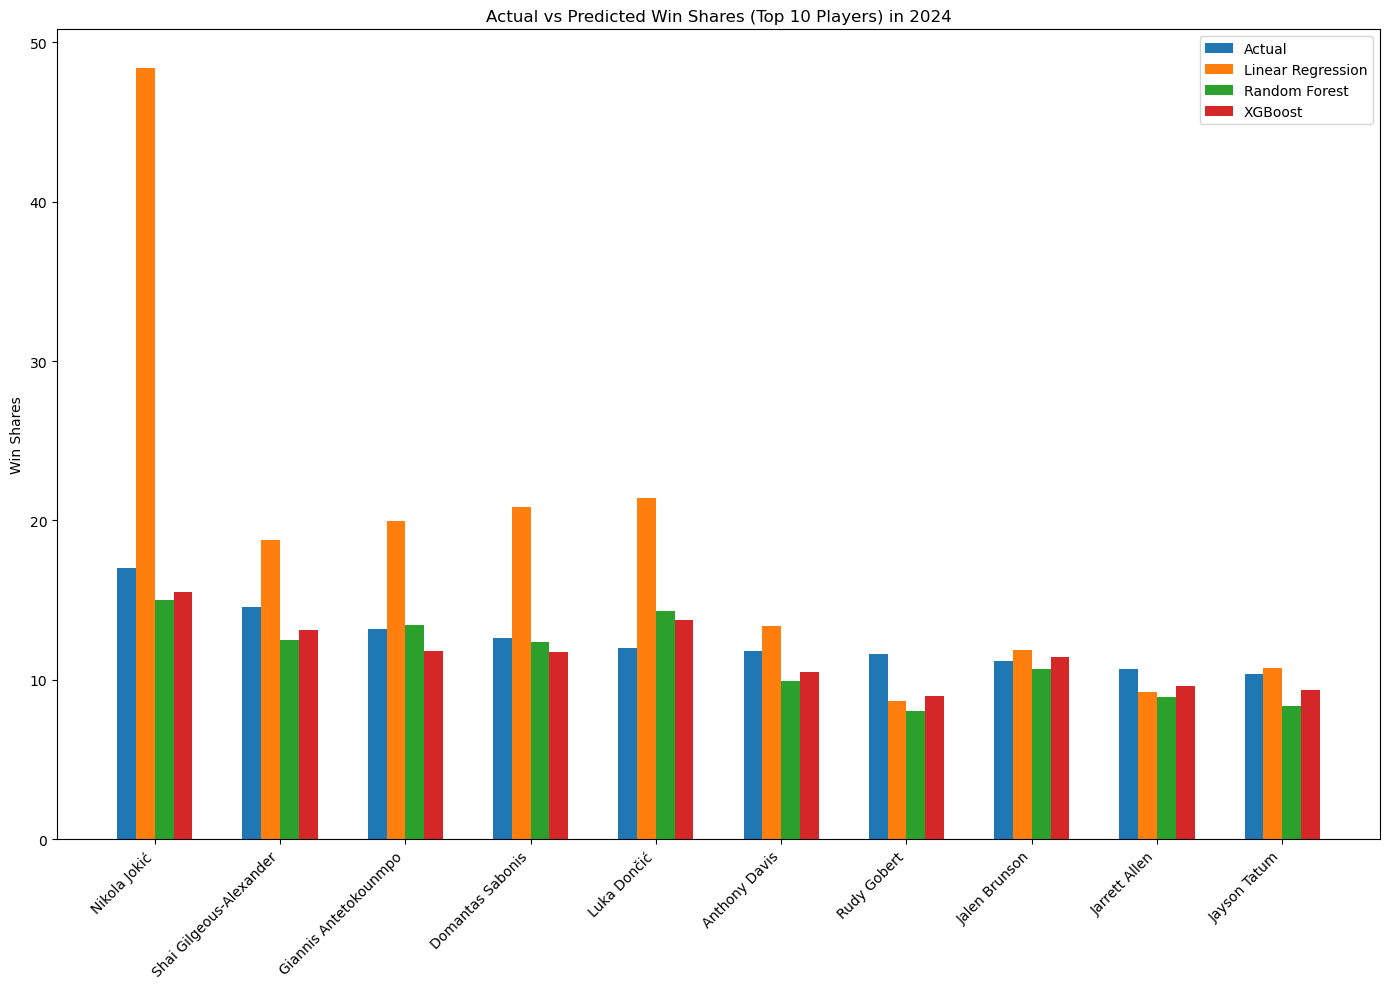

In [49]:
temp_df = Cleaned_Nbacombined[Cleaned_Nbacombined['Year'] == 2024].copy()
temp_df = temp_df.reset_index(drop=True)


temp_df['Actual'] = y_test.values
temp_df["Linear Regression"] = preds["Linear Regression"]
temp_df["Random Forest"] = preds["Random Forest"]
temp_df["XGBoost"] = preds["XGBoost"]


top10 = temp_df.sort_values('Actual', ascending=False).head(10)
players = top10['Player']


model_names = ['Actual','Linear Regression', 'Random Forest', 'XGBoost']
bar_data = top10[model_names].values.T

x = np.arange(len(players))
width = 0.15


fig, ax = plt.subplots(figsize=(14, 10))

for i, model in enumerate(model_names):
     ax.bar(x + i * width - width*1.5, bar_data[i], width, label=model)

ax.set_xticks(x)
ax.set_xticklabels(players, rotation=45, ha="right")
ax.set_ylabel("Win Shares")
ax.set_title("Actual vs Predicted Win Shares (Top 10 Players) in 2024")
ax.legend()

plt.tight_layout()
plt.show()

From the top 10 players with the highest win shares, we can that XGboost and Random forest are the bstter options for our model. Lets plot residuals to see if there is any bias in our model.

### Linear Regression Residuals

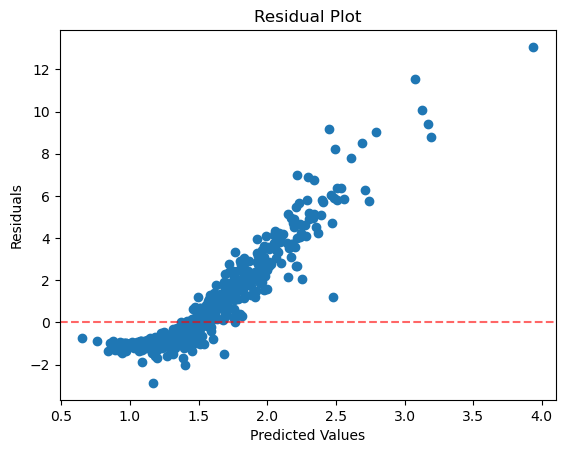

In [50]:
ypredLR = LR_Model.predict(X_test)
residuals = y_test - ypredLR
plt.scatter(ypredLR, residuals)
plt.axhline(0, color='red', linestyle='--',alpha=0.6) 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### XGBoost Model Residuals

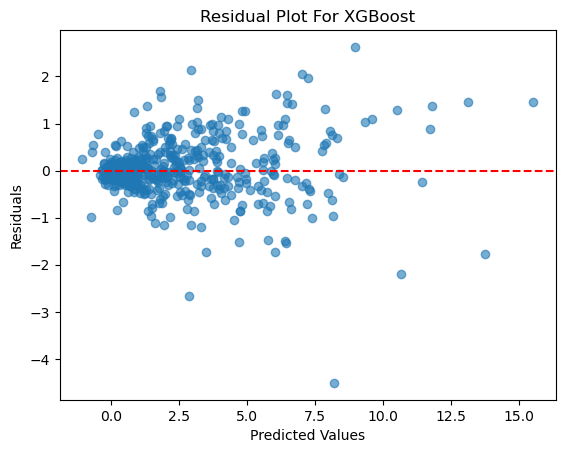

In [51]:
y_test_array = y_test.values.ravel() 
ypredXGB = XGB_reg.predict(X_test)
residuals = y_test_array - ypredXGB
plt.scatter(ypredXGB, residuals,alpha = 0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot For XGBoost')
plt.show()

### Random Forest Residuals

Text(0.5, 1.0, 'Residual Plot For Random Forest')

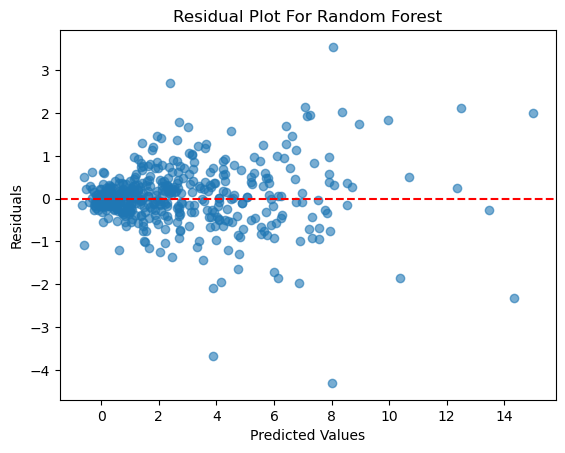

In [53]:
y_test_array = y_test.values.ravel() 
ypredRF =best_rf_model.predict(X_test)
residuals = y_test_array - ypredRF
plt.scatter(ypredRF, residuals,alpha = 0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot For Random Forest')

The residual plot for the linear regression shows curvature, indicating that a linear regression model may not be the best fit for the data.
Both the residal plot of XGBmodel and RandomForest model are almost similar, But the R2 and RMSE score of the XGB model is better than the RandomForest model. So the final model to be chosen is XGB model.

In [54]:
import joblib

In [57]:
joblib.dump(XGB_reg, "best_xgboost_model.pkl")

['best_xgboost_model.pkl']